
# 📘 Chapter 13: Model Evaluation

This chapter explores **Model Evaluation**, the process of measuring how well a machine learning model generalizes to unseen data.  
The discussion is presented in third‑person, textbook style, with LaTeX equations and practical examples.



## 13.1 Why Evaluate?

Training accuracy alone is insufficient: a model may **overfit** (memorize training data) or **underfit** (fail to capture patterns).  
Evaluation ensures the model is useful for real‑world predictions by assessing generalization on test data.



## 13.2 Splitting Data

Data is typically divided into subsets:

- **Training set**: used to fit the model.  
- **Validation set**: used for hyperparameter tuning.  
- **Test set**: used once for final evaluation.  

Cross‑validation provides a systematic way of averaging performance across multiple train/test splits.



## 13.3 Classification Metrics

For binary classification, predictions are summarized in a **confusion matrix**:

|                | Predicted Positive | Predicted Negative |
|----------------|--------------------|--------------------|
| **Actual Positive** | True Positive (TP)   | False Negative (FN)  |
| **Actual Negative** | False Positive (FP)  | True Negative (TN)   |

From this:

- **Accuracy**:
$$
\text{Acc} = \frac{TP + TN}{TP + TN + FP + FN}
$$

- **Precision**:
$$
\text{Prec} = \frac{TP}{TP + FP}
$$

- **Recall (Sensitivity)**:
$$
\text{Rec} = \frac{TP}{TP + FN}
$$

- **F1 Score** (harmonic mean):
$$
F1 = 2 \cdot \frac{\text{Prec}\cdot \text{Rec}}{\text{Prec} + \text{Rec}}
$$



## 13.4 Regression Metrics

For regression tasks, common metrics are:

- **Mean Squared Error (MSE):**
$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

- **Mean Absolute Error (MAE):**
$$
\text{MAE} = \frac{1}{n}\sum_{i=1}^n |y_i - \hat{y}_i|
$$

- **Coefficient of Determination (\(R^2\)):**
$$
R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
$$



## 13.5 Hands‑On A: Logistic Regression on Iris

Train a classifier on two Iris classes and evaluate metrics.


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split

# Use only 2 classes for binary classification (setosa vs versicolor)
iris = load_iris()
X = iris.data[iris.target != 2, :2]  # two features, two classes
y = iris.target[iris.target != 2]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Fit logistic regression
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[15  0]
 [ 0 15]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




## 13.6 ROC Curve and AUC

The **Receiver Operating Characteristic (ROC)** curve plots True Positive Rate (TPR) against False Positive Rate (FPR) at different thresholds.  
The **Area Under the Curve (AUC)** summarizes performance: 1.0 is perfect, 0.5 is random guessing.


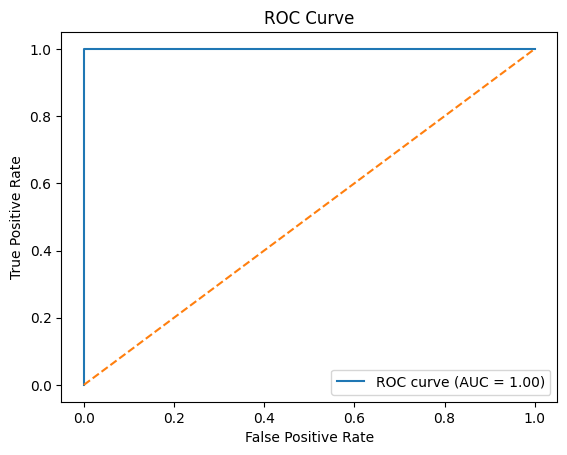

In [2]:

# Compute ROC curve
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="ROC curve (AUC = %.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()



## 13.7 Cross‑Validation

Rather than relying on a single train/test split, **k‑fold cross‑validation** partitions the data into \(k\) folds.  
Each fold serves once as validation, and performance is averaged over folds.


In [3]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(), X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy: %.3f" % scores.mean())


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.000



## 13.8 Bias–Variance Trade‑Off

- **High bias (underfitting):** model too simple, misses patterns.  
- **High variance (overfitting):** model too complex, fits noise.  
- Proper evaluation balances these by choosing appropriate complexity.



## 13.9 Summary

- Classification metrics: accuracy, precision, recall, F1, ROC, AUC.  
- Regression metrics: MSE, MAE, \(R^2\).  
- Confusion matrices and ROC curves visualize performance.  
- Cross‑validation provides robust estimates.  
- Model evaluation helps guard against overfitting and underfitting.
